This code is a copy of APM_Audio.ipynb with a XGBoost and SVC models appended to the end.

In [0]:
!pip install -U -q PyDrive

In [0]:
!pip install -U -q librosa

     |████████████████████████████████| 1.6MB 5.0MB/s 
     |████████████████████████████████| 3.6MB 49.9MB/s 


In [0]:
import os
import librosa
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [0]:
pwd

'/content'

In [0]:
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/APM' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd '/content/gdrive/My Drive/Audio_Speech_Actors_01-24'

/content/gdrive/My Drive/Audio_Speech_Actors_01-24


In [0]:
emotion = {'01' : 'Neutral', '02' : 'Calm', '03' : 'Happy', '04' : 'Sad', '05' : 'Angry', '06' : 'Fearful', '07' : 'Disgust', '08' : 'Surprised'}
emotional_intensity = {'01' : 'normal', '02' : 'strong'}

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong)
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
main_folder_list = drive.ListFile(
    {'q': "'11zcGwk7FPpA-S2iOkSBF40_4HuNUAcOf' in parents"}).GetList()

In [0]:
features = DataFrame(columns= ['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'min mfcc1', 'min mfcc2', 'min mfcc3', 'min mfcc4', 'min mfcc5', 'min mfcc6', 'min mfcc7', 'min mfcc8', 'min mfcc9', 'min mfcc10', 'min mfcc11', 'min mfcc12', 'min mfcc13', 'max mfcc1', 'max mfcc2', 'max mfcc3', 'max mfcc4', 'max mfcc5', 'max mfcc6', 'max mfcc7', 'max mfcc8', 'max mfcc9', 'max mfcc10', 'max mfcc11', 'max mfcc12', 'max mfcc13', 'sd mfcc1', 'sd mfcc2', 'sd mfcc3', 'sd mfcc4', 'sd mfcc5', 'sd mfcc6', 'sd mfcc7', 'sd mfcc8', 'sd mfcc9', 'sd mfcc10', 'sd mfcc11', 'sd mfcc12', 'sd mfcc13', 'delta mfcc1', 'delta mfcc2', 'delta mfcc3', 'delta mfcc4', 'delta mfcc5', 'delta mfcc6', 'delta mfcc7', 'delta mfcc8', 'delta mfcc9', 'delta mfcc10', 'delta mfcc11', 'delta mfcc12', 'delta mfcc13', 'delta min mfcc1', 'delta min mfcc2', 'delta min mfcc3', 'delta min mfcc4', 'delta min mfcc5', 'delta min mfcc6', 'delta min mfcc7', 'delta min mfcc8', 'delta min mfcc9', 'delta min mfcc10', 'delta min mfcc11', 'delta min mfcc12', 'delta min mfcc13', 'delta max mfcc1', 'delta max mfcc2', 'delta max mfcc3', 'delta max mfcc4', 'delta max mfcc5', 'delta max mfcc6', 'delta max mfcc7', 'delta max mfcc8', 'delta max mfcc9', 'delta max mfcc10', 'delta max mfcc11', 'delta max mfcc12', 'delta max mfcc13', 'delta sd mfcc1', 'delta sd mfcc2', 'delta sd mfcc3', 'delta sd mfcc4', 'delta sd mfcc5', 'delta sd mfcc6', 'delta sd mfcc7', 'delta sd mfcc8', 'delta sd mfcc9', 'delta sd mfcc10', 'delta sd mfcc11', 'delta sd mfcc12', 'delta sd mfcc13', 'delta delta mfcc1', 'delta delta mfcc2', 'delta delta mfcc3', 'delta delta mfcc4', 'delta delta mfcc5', 'delta delta mfcc6', 'delta delta mfcc7', 'delta delta mfcc8', 'delta delta mfcc9', 'delta delta mfcc10', 'delta delta mfcc11', 'delta delta mfcc12', 'delta delta mfcc13', 'delta delta min mfcc1', 'delta delta min mfcc2', 'delta delta min mfcc3', 'delta delta min mfcc4', 'delta delta min mfcc5', 'delta delta min mfcc6', 'delta delta min mfcc7', 'delta delta min mfcc8', 'delta delta min mfcc9', 'delta delta min mfcc10', 'delta delta min mfcc11', 'delta delta min mfcc12', 'delta delta min mfcc13', 'delta delta max mfcc1', 'delta delta max mfcc2', 'delta delta max mfcc3', 'delta delta max mfcc4', 'delta delta max mfcc5', 'delta delta max mfcc6', 'delta delta max mfcc7', 'delta delta max mfcc8', 'delta delta max mfcc9', 'delta delta max mfcc10', 'delta delta max mfcc11', 'delta delta max mfcc12', 'delta delta max mfcc13', 'delta delta sd mfcc1', 'delta delta sd mfcc2', 'delta delta sd mfcc3', 'delta delta sd mfcc4', 'delta delta sd mfcc5', 'delta delta sd mfcc6', 'delta delta sd mfcc7', 'delta delta sd mfcc8', 'delta delta sd mfcc9', 'delta delta sd mfcc10', 'delta delta sd mfcc11', 'delta delta sd mfcc12', 'delta delta sd mfcc13', 'energy', 'zero crossing rate', 'spectral centroid', 'spectral rolloff', 'emotion', 'emotional intensity', 'gender', 'actor'])
i = 0
for folder in main_folder_list:
  actor_folder = drive.ListFile(
      {'q': "'" + folder['id'] + "' in parents"}).GetList()
  path = folder['title']

  for file in actor_folder:
    file_name = os.path.join(path, file['title'])
    y, sr = librosa.load(file_name)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc)
    delta_delta_mfcc = librosa.feature.delta(mfcc, order = 2)

    min_mfcc = np.min(mfcc, axis = 1)
    min_delta_mfcc = np.min(delta_mfcc, axis = 1)
    min_delta_delta_mfcc = np.min(delta_delta_mfcc, axis = 1)

    max_mfcc = np.max(mfcc, axis = 1)
    max_delta_mfcc = np.max(delta_mfcc, axis = 1)
    max_delta_delta_mfcc = np.max(delta_delta_mfcc, axis = 1)

    sd_mfcc = np.std(mfcc, axis = 1)
    sd_delta_mfcc = np.std(delta_mfcc, axis = 1)
    sd_delta_delta_mfcc = np.std(delta_delta_mfcc, axis = 1)

    mfcc = mfcc.T
    mfcc = np.mean(mfcc, axis = 0)
    delta_mfcc = delta_mfcc.T
    delta_mfcc = np.mean(delta_mfcc, axis = 0)
    delta_delta_mfcc = delta_delta_mfcc.T
    delta_delta_mfcc = np.mean(delta_delta_mfcc, axis = 0)

    mfcc_index = 1

    for m in range(0,13):
      features.at[i, 'mfcc'+str(mfcc_index)] = mfcc[m]
      features.at[i, 'delta mfcc'+str(mfcc_index)] = delta_mfcc[m]
      features.at[i, 'delta delta mfcc'+str(mfcc_index)] = delta_delta_mfcc[m]

      features.at[i, 'min mfcc'+str(mfcc_index)] = min_mfcc[m]
      features.at[i, 'delta min mfcc'+str(mfcc_index)] = min_delta_mfcc[m]
      features.at[i, 'delta delta min mfcc'+str(mfcc_index)] = min_delta_delta_mfcc[m]

      features.at[i, 'max mfcc'+str(mfcc_index)] = max_mfcc[m]
      features.at[i, 'delta max mfcc'+str(mfcc_index)] = max_delta_mfcc[m]
      features.at[i, 'delta delta max mfcc'+str(mfcc_index)] = max_delta_delta_mfcc[m]

      features.at[i, 'sd mfcc'+str(mfcc_index)] = sd_mfcc[m]
      features.at[i, 'delta sd mfcc'+str(mfcc_index)] = sd_delta_mfcc[m]
      features.at[i, 'delta delta sd mfcc'+str(mfcc_index)] = sd_delta_delta_mfcc[m]

      mfcc_index = mfcc_index + 1

    features.at[i, 'zero crossing rate'] = np.mean(librosa.feature.zero_crossing_rate(y=y))
    features.at[i, 'spectral centroid'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features.at[i, 'spectral rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    features.at[i, 'energy'] = np.mean(librosa.feature.rmse(y=y))
    filename = file['title'].rstrip('.wav')
    file_attributes = filename.split('-')
    features.at[i, 'emotion'] = int(file_attributes[2])
    features.at[i, 'emotional intensity'] = int(file_attributes[3])
    features.at[i, 'gender'] = 'female' if int(file_attributes[6])%2 == 0 else 'male'
    features.at[i, 'actor'] = int(file_attributes[6])
    
    i = i + 1

features.head(5)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,min mfcc1,min mfcc2,min mfcc3,min mfcc4,min mfcc5,min mfcc6,min mfcc7,min mfcc8,min mfcc9,min mfcc10,min mfcc11,min mfcc12,min mfcc13,max mfcc1,max mfcc2,max mfcc3,max mfcc4,max mfcc5,max mfcc6,max mfcc7,max mfcc8,max mfcc9,max mfcc10,max mfcc11,max mfcc12,max mfcc13,sd mfcc1,...,delta delta min mfcc8,delta delta min mfcc9,delta delta min mfcc10,delta delta min mfcc11,delta delta min mfcc12,delta delta min mfcc13,delta delta max mfcc1,delta delta max mfcc2,delta delta max mfcc3,delta delta max mfcc4,delta delta max mfcc5,delta delta max mfcc6,delta delta max mfcc7,delta delta max mfcc8,delta delta max mfcc9,delta delta max mfcc10,delta delta max mfcc11,delta delta max mfcc12,delta delta max mfcc13,delta delta sd mfcc1,delta delta sd mfcc2,delta delta sd mfcc3,delta delta sd mfcc4,delta delta sd mfcc5,delta delta sd mfcc6,delta delta sd mfcc7,delta delta sd mfcc8,delta delta sd mfcc9,delta delta sd mfcc10,delta delta sd mfcc11,delta delta sd mfcc12,delta delta sd mfcc13,energy,zero crossing rate,spectral centroid,spectral rolloff,emotion,emotional intensity,gender,actor
0,-533.045,47.1225,-6.09384,8.94463,4.93551,-6.66109,-5.05393,-8.27379,-16.1572,2.82077,-5.2163,-9.67073,-2.61595,-720.596,-94.008,-108.218,-38.0194,-30.035,-92.7844,-44.5858,-46.5587,-68.7809,-30.1064,-40.5255,-38.5796,-23.1111,-191.237,175.707,62.5254,65.908,48.4325,34.5945,30.8453,23.9965,5.07842,31.4902,18.2734,8.6967,21.3937,204.267,...,-4.07968,-4.58451,-3.64799,-1.91164,-3.31813,-3.35111,36.7436,15.4097,12.5978,6.239,3.95146,11.8198,3.8258,3.88914,4.69364,3.16973,2.62382,2.60722,2.60183,10.1689,4.58758,3.75266,2.07693,1.73186,3.15285,1.46767,1.45338,1.8563,1.04565,0.856766,0.939425,0.800004,0.0133196,0.312139,2922.08,5568.99,8,2,male,21
1,-514.719,44.0469,-3.27954,10.6553,2.82412,-6.11898,-6.50701,-7.42131,-15.6798,0.716686,-7.20684,-9.33302,-2.71358,-701.176,-106.636,-90.9631,-25.9776,-35.5209,-86.6406,-48.0912,-49.989,-67.0044,-22.0225,-40.2155,-40.5573,-19.0157,-191.453,164.397,73.0543,60.8076,45.1698,33.8823,24.7675,26.3215,4.57314,26.9597,16.9991,5.42236,19.1892,200.321,...,-4.73307,-4.72479,-2.81543,-2.47207,-1.78852,-2.30682,36.7045,16.9342,10.2892,5.03623,5.00285,12.5865,3.30075,4.22162,5.85658,2.40903,2.7557,3.27581,2.22083,9.76432,4.87863,3.73136,1.70628,1.78821,3.0327,1.41576,1.51718,1.99757,0.835021,0.911788,0.846654,0.723713,0.0131688,0.314874,2962.45,5807.21,8,2,male,21
2,-508.61,52.5481,-9.87749,11.0642,1.55071,-10.5872,-7.59315,-4.88797,-16.3826,-2.82117,-6.56978,-10.2854,-1.8328,-711.401,-31.3905,-95.7198,-35.4458,-52.234,-80.449,-61.2951,-49.841,-64.1221,-32.9391,-36.3061,-43.8354,-27.2422,-184.641,182.165,61.9014,64.3727,42.1143,26.3435,27.6171,27.3137,13.9437,26.2932,7.90813,8.95783,22.3907,204.543,...,-4.91818,-5.59098,-4.33566,-2.13343,-3.3106,-3.11252,35.1288,15.0127,13.0143,7.05685,5.91837,9.84185,6.07603,3.92115,5.49217,2.48302,2.86142,3.75889,2.61352,9.81599,4.68387,3.91702,2.13004,1.97156,2.65844,1.57806,1.59539,1.92216,1.03649,0.803774,1.14766,1.0057,0.014588,0.308289,2923.97,5693.13,8,2,male,21
3,-504.264,46.3441,-6.16509,10.2339,3.05864,-7.68961,-6.43851,-4.9853,-16.2122,-0.381177,-6.62013,-10.1184,-1.70181,-680.927,-31.2997,-96.4267,-46.8981,-41.82,-89.5485,-59.6534,-47.9564,-68.407,-31.5959,-43.0163,-51.2613,-21.0928,-190.613,161.901,65.1216,71.4506,48.2115,28.4427,23.6391,27.7735,4.86043,22.4297,11.1264,5.06331,25.261,192.004,...,-5.45428,-4.598,-2.92742,-3.16772,-2.46113,-3.80621,32.4606,16.8859,11.2032,5.39161,5.54051,12.536,5.97383,4.86979,5.67471,2.449,3.38094,3.80136,2.80954,9.10847,4.63997,3.51066,2.07996,1.69264,2.70111,1.46712,1.68069,1.874,1.00067,0.95279,0.987601,0.864224,0.0148065,0.278927,2759.5,5601.24,8,2,male,21
4,-564.411,55.2176,-1.48368,8.94386,5.44996,-6.86756,-1.40782,-5.00282,-12.5575,-1.60668,-5.27823,-7.6926,-3.02514,-747.85,-30.8497,-106.983,-44.1942,-33.0814,-84.4694,-47.3038,-46.5616,-67.6103,-33.1826,-36.2119,-56.3

In [0]:
cd -

/content


In [0]:
features.to_csv('audio_features.csv',index = False)

In [0]:
features = pd.read_csv('audio_features.csv')

In [0]:
y = features['emotion']
y = y-1
y = y.astype('int')
X = features.drop(['emotion', 'gender', 'emotional intensity', 'spectral centroid','spectral rolloff','zero crossing rate'], axis = 1)
print(y.head())
print(X.head())

0    7
1    7
2    7
3    7
4    7
Name: emotion, dtype: int64
     mfcc1    mfcc2    mfcc3  ... delta delta sd mfcc13      energy actor
0 -533.045  47.1225 -6.09384  ...              0.800004   0.0133196    21
1 -514.719  44.0469 -3.27954  ...              0.723713   0.0131688    21
2  -508.61  52.5481 -9.87749  ...                1.0057    0.014588    21
3 -504.264  46.3441 -6.16509  ...              0.864224   0.0148065    21
4 -564.411  55.2176 -1.48368  ...               0.73355  0.00997137    21

[5 rows x 158 columns]


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

mask = X['actor'] <= 20

x_train = X[mask].drop(['actor'], axis = 1)
y_train = y[mask]
x_test = X[-mask].drop(['actor'], axis = 1)
y_test = y[-mask]

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test) # scale train and test separately

In [0]:
svm = SVC(kernel = 'rbf', gamma = 'auto')
svm.fit(x_train,y_train)
print('Training:',svm.score(x_train,y_train))
print('Testing:',svm.score(x_test,y_test))

Training: 0.927920463960232
Testing: 0.5125


The SVC performs better than the CNN

In [0]:
# now use XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
# Too many parameters to try; use randomized search to pick a size 50 subset to test
params = {'subsample':[i/100 for i in range(25,76,10)], 
          'eta':[i/10 for i in range(1,6)], 
          'gamma':list(range(5)),
          'max_depth':list(range(4,9))}

clf = RandomizedSearchCV(XGBClassifier(), params, n_iter = 50, cv = 5, verbose = 2)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [0]:
bst = XGBClassifier(eta = 0.1, gamma = 0, max_depth = 6, subsample = .35)
bst.fit(x_train,y_train)
print('XGBoost train:',accuracy_score(clf.predict(x_train),y_train))
print('XGBoost test:',accuracy_score(clf.predict(x_test),y_test))

XGBoost train: 1.0
XGBoost test: 0.5


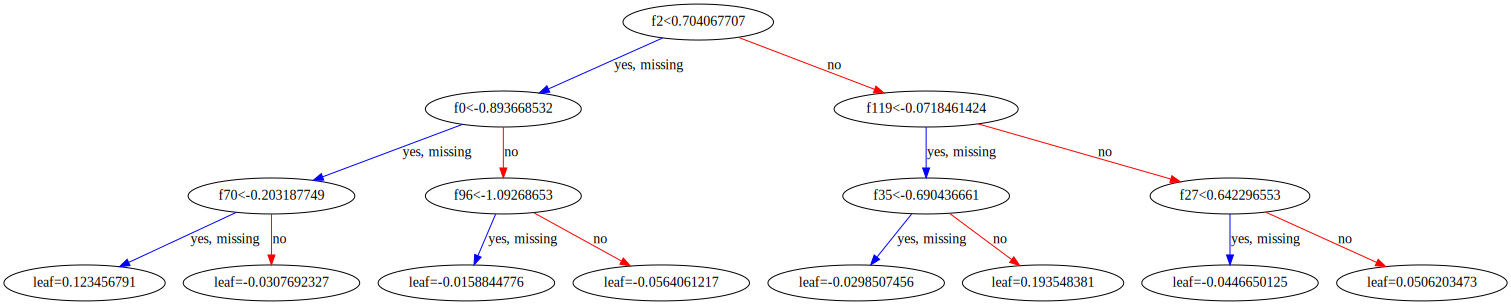

In [0]:
xgb.to_graphviz(boost)

XGBoost performs slightly worse than SVC but still better than the CNN